This notebook will explore anomalies in a data set of tweets from Facebook.

In [8]:
import pandas as pd
import sklearn as sc

In [9]:
df_tweets = pd.read_csv('../data/raw/realTweets/Twitter_volume_FB.csv')
df_tweets.head()

,timestamp,value
0,2015-02-26 21:42:53,53
1,2015-02-26 21:47:53,64
2,2015-02-26 21:52:53,49
3,2015-02-26 21:57:53,48
4,2015-02-26 22:02:53,22


In [10]:
df_tweets.dtypes

timestamp    object
value         int64
dtype: object

In [11]:
#converting the type of feature 'timestamp' to DateTime so we can extract various components
#from it if needed
df_tweets['timestamp'] = pd.to_datetime(df_tweets['timestamp'])
df_tweets.dtypes

timestamp    datetime64[ns]
value                 int64
dtype: object

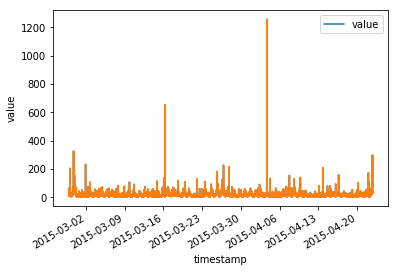

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
df_tweets.plot(x = "timestamp", y = "value")
sns.set
sns.lineplot(x="timestamp", y="value",
             data=df_tweets)

Finally got seaborn working; earlier was having issues with the module but looks like the problem was having an outdated version of seaborn running through conda. 

Looks like the tweets seem to have a pretty consistent value average, with a few anomalies particularly around
    - 2015-03-16
    - 2015-04-06
    - towards the beginning and end of the line plot

In [17]:
import sklearn as sc
from sklearn.model_selection import train_test_split

labels = df_tweets['value']
features = df_tweets[['timestamp']]
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [18]:
from sklearn.ensemble import IsolationForest

model = IsolationForest()
model.fit(X_train, y_train)
#Predicting the label of the new data set
prediction = model.predict(X_test)
print (prediction)

[ 1 -1  1 ...  1  1  1]


In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction,))

0.0034733185980423114


Definitely have to feature engineer more to get a higher prediction accuracy; let's try and separating the day, month, and year values from the dateTime column so we can use all those as features as well. 

In [22]:
df_tweets['day'] = df_tweets['timestamp'].dt.day
df_tweets['month'] = df_tweets['timestamp'].dt.month
df_tweets['year'] = df_tweets['timestamp'].dt.year
df_tweets.head(10)

,timestamp,value,day,month,year
0,2015-02-26 21:42:53,53,26,2,2015
1,2015-02-26 21:47:53,64,26,2,2015
2,2015-02-26 21:52:53,49,26,2,2015
3,2015-02-26 21:57:53,48,26,2,2015
4,2015-02-26 22:02:53,22,26,2,2015
5,2015-02-26 22:07:53,23,26,2,2015
6,2015-02-26 22:12:53,17,26,2,2015
7,2015-02-26 22:17:53,35,26,2,2015
8,2015-02-26 22:22:53,23,26,2,2015
9,2015-02-26 22:27:53,39,26,2,2015


And now, I'll run the isolation forest model again and see if we have some better results.

In [27]:
labels2 = df_tweets['value']
features2 = df_tweets[['day', 'month', 'year']]
X_train, X_test, y_train, y_test = train_test_split(features2, 
                                                    labels2, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [28]:
model2 = IsolationForest(max_samples=100, random_state=14)
model2.fit(X_train)
#Predicting the label of the new data set
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

In [30]:
print(list(y_pred_test).count(1)/y_pred_test.shape[0])

0.8891695610988317


This is much better! Don't know what I was thinking earlier with only having one timestamp feature being used in the model, but some of it might also be attributed to actually getting the right way of using the isolation forest. 